# Instalando o Pycaret

In [43]:
#!pip install pycaret

In [44]:
#!pip install scipy

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import shap
from pycaret.regression import *
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.cluster import KMeans 
from sklearn.feature_extraction import FeatureHasher

# Tratando a base

In [651]:
df= pd.read_excel("Base_2022_2023.xlsx")

In [652]:
df = df[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [653]:
#'taxa_homicidio',

In [654]:
df.head()

,cod_municipio_ibge,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,...,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia,porte_municipio
0,110001,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0,2
1,110002,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,...,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0,4
2,110003,49,Sim,Não,Não,Não,Sim,Não,Não,Não,...,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0,1
3,110004,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,...,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0,3
4,110005,257,Sim,Não,Sim,Não,Não,Não,Não,Não,...,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0,2


In [655]:
df.isnull().sum()

cod_municipio_ibge                      0
qtd_abertas_Empresario_Individual       0
Mecanismos_incentivo                    2
Reducao_IPTU                         2086
Isencao_IPTU                         2086
Reducao_ISSQN                        2086
Isencao_ISSQN                        2086
Isencao_Tx                           2086
Cessao_terrenos                      2086
Doacao_terrenos                      2086
Outros_mecanismos                    2086
taxa_homicidio                       1680
RH_adm_dir                             23
ISH                                     0
densidade_banda_larga                   0
densidade_telefonia_movel               0
qtd_cursos_engenharias               4377
qtd_cursos_negocios_direito          3564
media_notas_CN                         91
media_notas_CH                         84
media_NU_NOTA_LC                       84
media_NU_NOTA_MT                       91
media_NU_NOTA_REDACAO                  94
valor_medio_recebido_familia      

In [656]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

df['RH_adm_dir'] = df['RH_adm_dir'].fillna(0)

In [657]:
df.isnull().sum()

cod_municipio_ibge                      0
qtd_abertas_Empresario_Individual       0
Mecanismos_incentivo                    2
Reducao_IPTU                         2086
Isencao_IPTU                         2086
Reducao_ISSQN                        2086
Isencao_ISSQN                        2086
Isencao_Tx                           2086
Cessao_terrenos                      2086
Doacao_terrenos                      2086
Outros_mecanismos                    2086
taxa_homicidio                          0
RH_adm_dir                              0
ISH                                     0
densidade_banda_larga                   0
densidade_telefonia_movel               0
qtd_cursos_engenharias                  0
qtd_cursos_negocios_direito             0
media_notas_CN                         91
media_notas_CH                         84
media_NU_NOTA_LC                       84
media_NU_NOTA_MT                       91
media_NU_NOTA_REDACAO                  94
valor_medio_recebido_familia      

In [658]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [659]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [660]:
df = pd.get_dummies(df, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [661]:
df = df[np.isfinite(df).all(1)]

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_municipio_ibge                 5570 non-null   int64  
 1   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 2   taxa_homicidio                     5570 non-null   float64
 3   RH_adm_dir                         5570 non-null   float64
 4   densidade_banda_larga              5570 non-null   float64
 5   densidade_telefonia_movel          5570 non-null   float64
 6   qtd_cursos_engenharias             5570 non-null   float64
 7   qtd_cursos_negocios_direito        5570 non-null   float64
 8   media_notas_CN                     5570 non-null   float64
 9   media_notas_CH                     5570 non-null   float64
 10  media_NU_NOTA_LC                   5570 non-null   float64
 11  media_NU_NOTA_MT                   5570 non-null   float

In [663]:
df = df.set_index('cod_municipio_ibge')

In [664]:
df

,qtd_abertas_Empresario_Individual,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,194,8.0,926.0,8.958074,70.647540,2.0,30.0,497.721951,504.034091,491.079545,...,0,0,0,0,0,0,0,0,0,0
110002,1275,38.0,2563.0,21.363407,93.858639,99.0,342.0,474.773986,495.727950,484.710248,...,0,0,1,0,1,1,0,0,1,0
110003,49,0.0,344.0,5.407539,78.369844,0.0,0.0,477.266667,486.071429,447.628571,...,0,1,0,0,0,1,0,0,0,0
110004,1258,21.0,1971.0,19.480189,105.350861,184.0,422.0,489.744000,505.006061,490.991919,...,1,0,1,1,1,0,0,0,0,0
110005,257,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268750,477.045714,454.722857,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,222,1.0,528.0,6.423907,106.821408,4.0,12.0,449.954054,479.917073,473.014634,...,0,0,0,0,0,0,0,1,0,0
522205,66,0.0,394.0,8.442568,104.276827,0.0,0.0,450.285714,464.383333,457.593333,...,0,0,1,0,1,0,0,0,1,0
522220,23,0.0,403.0,1.240118,66.485816,0.0,0.0,431.645455,443.025000,426.491667,...,0,0,0,1,1,0,0,0,0,0


## Nova base teste

In [665]:
df_2 = pd.read_excel("Base_novos_dados_2018_2019.xlsx")

In [666]:
df_2 = df_2[['cod_municipio_ibge','qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia','porte_municipio']]

In [667]:
#'taxa_homicidio',

In [668]:
df_2['qtd_cursos_engenharias'] = df_2['qtd_cursos_engenharias'].fillna(0)

df_2['qtd_cursos_negocios_direito'] = df_2['qtd_cursos_negocios_direito'].fillna(0)

df_2['total_sim_tecnologia'] = df_2['total_sim_tecnologia'].fillna(0)

df_2['taxa_homicidio'] = df_2['taxa_homicidio'].fillna(0)

df_2['RH_adm_dir'] = df_2['RH_adm_dir'].fillna(0)

In [669]:
df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df_2[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [670]:
df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df_2[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [671]:
df_2 = pd.get_dummies(df_2, columns = ['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','ISH'], drop_first=True)

In [672]:
df_2 = df_2[np.isfinite(df_2).all(1)]

In [673]:
df_2 = df_2.set_index('cod_municipio_ibge')

# Dividindo em treino e test

Adaleny, fiz a divisão de treino e teste baseado na estratificação

In [388]:
treino = df.groupby('porte_municipio', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste = df.drop(treino.index)

print(treino.shape, teste.shape)

(4178, 31) (1392, 31)


In [389]:
treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

treino = treino.drop('porte_municipio', axis = 1)
teste= teste.drop('porte_municipio', axis = 1)

In [170]:
#teste= teste.drop('qtd_abertas_Empresario_Individual', axis = 1)

treino.info()

# Pycaret

## Setup

In [252]:
regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(2917, 30)"
4,Transformed data shape,"(2917, 30)"
5,Transformed train set shape,"(2041, 30)"
6,Transformed test set shape,"(876, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


## Comparando Modelos 

### Usando RMSE

In [253]:
best_model = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,171.6576,298321.7718,523.0780,0.9510,0.6560,0.6207,0.6300
omp,Orthogonal Matching Pursuit,214.0139,312875.3136,553.8513,0.9550,0.9643,1.5100,0.6180
ridge,Ridge Regression,210.4716,413811.5919,597.4534,0.9593,1.0091,1.9062,0.5920
lr,Linear Regression,210.6926,413567.0580,597.5141,0.9593,1.0001,1.9031,1.5380
en,Elastic Net,207.6908,416355.2670,597.8088,0.9592,1.0062,1.8710,0.6000
lasso,Lasso Regression,210.1120,415239.6239,597.9895,0.9592,1.0092,1.9065,0.8480
llar,Lasso Least Angle Regression,210.1120,415239.7453,597.9895,0.9592,1.0092,1.9065,0.6040
br,Bayesian Ridge,205.3141,414479.0779,598.4099,0.9590,1.0002,1.8229,0.6160
lar,Least Angle Regression,213.6764,421199.2027,602.1601,0.9589,1.0061,1.9463,0.5960
par,Passive Aggressive Regressor,300.0077,1202231.5493,1019.8987,0.7927,1.0446,1.4667,0.6440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [173]:
# verificando os hiperparâmetros do modelo 

print(best_model)

HuberRegressor()


In [254]:
best_model = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,303.0609,11715596.9061,3422.8054,0.6126,0.4407,0.4147
1,154.8660,277115.6017,526.4177,0.9497,0.3956,0.3589
2,139.1830,369923.5604,608.2134,0.9154,0.3928,0.3599
3,87.1721,67887.0577,260.5514,0.9928,0.4086,0.3899
4,134.1756,302357.2380,549.8702,0.9571,0.3944,0.3848
Mean,163.6915,2546576.0728,1073.5716,0.8855,0.4064,0.3816
Std,73.2513,4585621.6033,1180.6862,0.1387,0.0180,0.0208


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Plotando alguns graficos 

In [74]:
#evaluate_model(best_model)

In [75]:
#plot_model(best_model, plot = 'learning')

In [76]:
#plot_model(best_model, plot='vc')

In [77]:
#plot_model(best_model, plot='error')

In [78]:
#plot_model(best_model, plot='feature')

In [79]:
#plot_model(best_model, plot='residuals',  scale = 3)

### Tunando o modelo

In [255]:
tuned = tune_model(best_model, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,369.1799,13050285.4622,3612.5179,0.5685,0.9466,1.5327
1,203.1473,241064.4981,490.9832,0.9562,0.8688,1.2879
2,219.0719,479939.5643,692.7767,0.8902,0.9019,1.4253
3,163.5742,199536.9278,446.6956,0.9790,0.9610,1.6094
4,206.8718,658738.7877,811.6272,0.9066,0.8851,1.4839
Mean,232.3690,2925913.0480,1210.9201,0.8601,0.9127,1.4678
Std,70.8954,5064924.8894,1208.1331,0.1493,0.0355,0.1084


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
print(tuned)

RandomForestRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=2, min_samples_split=7, n_estimators=280,
                      n_jobs=-1, random_state=42)


In [82]:
#plot_model(tuned, plot = 'learning')  #use_train_data = True

In [83]:
# Validation Curve
#plot_model(tuned, plot='vc')


In [84]:
#plot_model(tuned, plot='error')


In [85]:
#plot_model(tuned, plot='feature' )

In [86]:
#plot_model(tuned, plot='feature', save = True )

In [87]:
#plot_model(tuned, plot='residuals',  scale = 3)

In [256]:
final_model_baseline = finalize_model(best_model)

### Previsão

In [257]:
pred_treino = predict_model(final_model_baseline, data = treino)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,83.4539,1869417.1177,1367.2663,0.9441,0.1691,0.1335


In [258]:
pred_treino

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
520060,3.0,0.0,8.308605,163.372467,0.0,16.0,443.952637,469.625000,466.609985,493.347382,...,0,0,0,0,0,0,1,0,249,201.12
313480,2.0,268.0,19.285250,79.376221,0.0,0.0,434.649994,473.515381,469.438477,463.533325,...,0,1,1,1,0,0,0,0,81,79.35
311870,1.0,317.0,11.968349,87.361252,0.0,1.0,420.488220,441.776459,447.899994,480.458832,...,0,0,0,0,0,1,0,0,118,113.22
280445,2.0,371.0,4.715484,61.289955,0.0,0.0,469.736359,472.027283,467.236359,508.745453,...,0,0,0,0,0,0,1,0,26,37.82
412270,5.0,360.0,27.581247,93.183777,0.0,0.0,457.409363,490.975006,476.968750,494.706238,...,0,0,0,0,0,1,0,0,107,106.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355030,454.0,127721.0,32.097408,125.004189,12809.0,52259.0,515.010742,548.616333,534.100159,581.029175,...,0,0,0,1,0,0,1,0,253408,184130.57
291080,264.0,5937.0,11.146967,125.226761,494.0,1546.0,497.371368,523.909973,509.181915,543.344971,...,0,0,0,0,0,0,0,0,9589,9948.67
430510,86.0,7345.0,34.121548,101.562866,484.0,1699.0,520.229065,556.289062,535.819946,581.916504,...,0,0,0,0,0,0,1,0,9898,9848.11


Text(0, 0.5, 'Valores preditos')

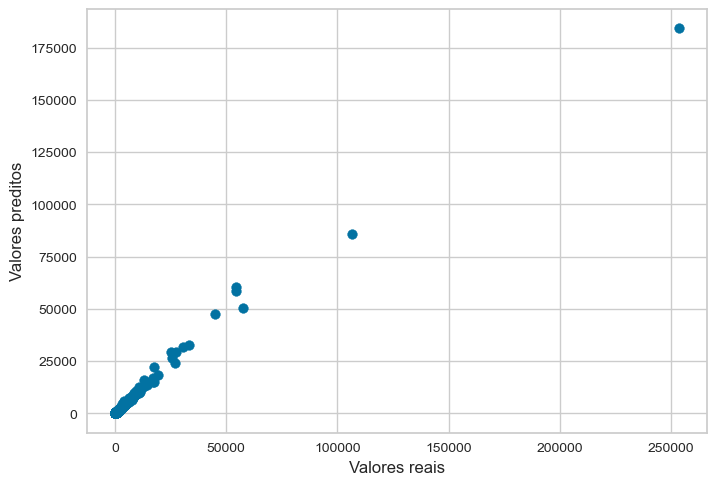

In [259]:
plt.scatter(pred_treino['qtd_abertas_Empresario_Individual'],pred_treino['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')

Previsão de dados não vistos

In [260]:
pred_unseen = predict_model(final_model_baseline, data = teste)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,109.7948,220841.4974,469.9378,0.9558,0.3947,0.3683


In [261]:
pred_unseen

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110005,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268738,477.045715,454.722870,480.696869,...,0,0,0,0,1,0,0,0,257,211.90
110008,3.0,573.0,4.388471,35.367435,5.0,12.0,438.418182,465.692108,451.828949,478.290924,...,1,1,0,0,1,0,0,0,106,104.68
110011,10.0,1484.0,20.346228,101.132721,8.0,114.0,472.343292,501.169189,481.437683,507.111206,...,0,0,0,0,0,0,1,0,617,751.70
110015,6.0,1425.0,12.963747,111.262520,18.0,60.0,458.246887,476.906860,470.326019,507.700012,...,0,1,0,0,0,0,0,0,461,495.50
110028,11.0,1525.0,10.504413,94.146873,189.0,249.0,480.525269,494.438934,469.141052,517.863159,...,0,0,1,0,0,0,1,0,709,746.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521960,1.0,242.0,23.012161,106.454628,0.0,0.0,444.250000,426.750000,423.709991,503.850006,...,0,1,0,0,0,1,0,0,58,40.46
521975,32.0,2010.0,7.016951,74.494934,6.0,80.0,447.338013,488.795135,482.230103,484.617004,...,0,0,0,0,0,0,0,0,718,516.41
522015,2.0,336.0,1.425043,113.585411,0.0,0.0,475.863647,467.727264,469.909088,464.972717,...,0,0,1,0,0,0,1,0,45,56.20


Text(0, 0.5, 'Valores preditos')

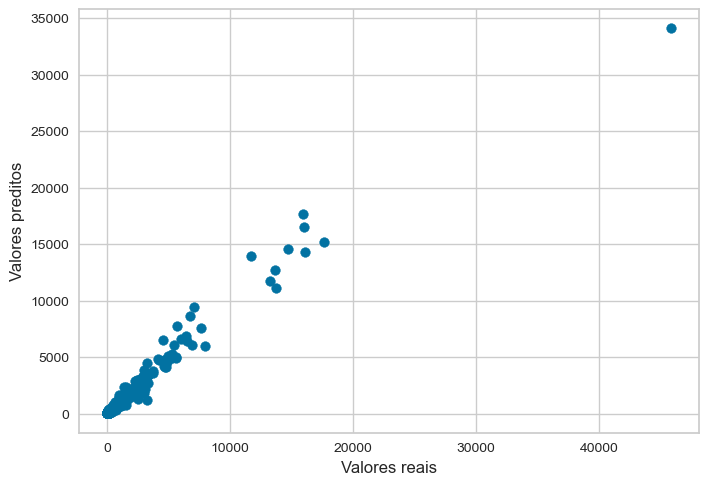

In [263]:
plt.scatter(pred_unseen['qtd_abertas_Empresario_Individual'],pred_unseen['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

## Previsão - Novos dados (VIs = 2018 e VD = 2019) 

In [36]:
pred_treino_2 = predict_model(final_model_baseline, data = df_2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,116.0603,988416.7487,994.1915,0.9408,0.4431,0.4471


In [37]:
pred_treino_2

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7.0,926.0,5.391153,34.342995,6.0,23.0,480.664276,543.020264,495.929718,502.991425,...,0,0,0,0,0,0,0,0,167,230.73
110002,41.0,2563.0,11.445074,86.588539,42.0,299.0,481.314240,549.247253,513.304749,512.975891,...,1,0,1,1,0,0,1,0,1058,1443.61
110003,0.0,344.0,3.990964,79.838104,0.0,0.0,442.604156,506.685181,466.007416,484.924988,...,0,0,0,1,0,0,0,0,50,55.36
110004,17.0,1971.0,12.382995,89.462151,202.0,469.0,484.990723,549.739380,513.924805,524.946716,...,1,1,1,0,0,0,0,0,987,1304.79
110005,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433807,551.494751,498.394745,493.949310,...,0,0,0,0,1,0,0,0,181,212.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,2.0,528.0,7.191805,33.744499,0.0,0.0,474.571777,522.414612,493.386505,503.091766,...,0,0,0,0,0,1,0,0,150,113.18
522205,4.0,394.0,8.601167,78.874527,0.0,0.0,439.651611,498.125641,463.625641,479.803223,...,1,0,1,0,0,0,1,0,47,82.81
522220,3.0,403.0,5.055907,5.833738,0.0,0.0,440.164276,513.099976,450.394440,504.899994,...,0,1,1,0,0,0,0,0,22,40.39


Text(0, 0.5, 'Valores preditos')

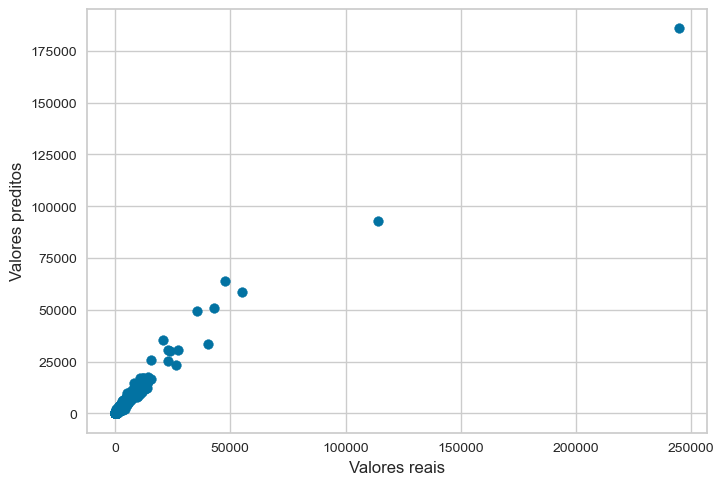

In [38]:
plt.scatter(pred_treino_2['qtd_abertas_Empresario_Individual'],pred_treino_2['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [52]:
#df.to_excel('dados_previsao.xlsx')

## Testando Radom Forest

### MAPE

In [68]:
#regression_setup = setup(data = treino, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

In [69]:
#best_model_mape = compare_models(sort = 'MAPE', fold=5)

In [70]:
#print(best_model_mape)

In [71]:
#best_model_mape = create_model('rf', fold = 5)

In [72]:
#tuned_mape = tune_model(best_model_mape, fold = 5)

In [73]:
#plot_model(best_model_mape, plot='feature' )

In [74]:
#final_model_baseline_mape = finalize_model(best_model_mape)

In [75]:
#pred_teste_mape= predict_model(final_model_baseline_mape, data = teste)

In [76]:
#pred_teste_mape

In [77]:
#plt.scatter(pred_teste_mape['qtd_abertas_Empresario_Individual'],pred_teste_mape['prediction_label'])
#plt.xlabel('Valores reais')
#plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [78]:
#pred_teste_mape.to_excel('previsao_mape.xlsx')

### Previsão - Mape 2019

In [79]:
#pred_2018_2019 = predict_model(final_model_baseline_mape, data = df_2)

In [80]:
#pred_2018_2019

In [81]:
#plt.scatter(pred_2018_2019['qtd_abertas_Empresario_Individual'],pred_2018_2019['prediction_label'])
#plt.xlabel('Valores reais')
#plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [82]:
#pred_2018_2019.to_excel('previsao_mape_2018_2019.xlsx')

-------------------------------------------------------------------------------------------------------------------------------

## Clusterização 

###  K-means 2022

In [704]:
df_c_22 = df

In [705]:
df_c_22 = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
df_c_22= df_c_22.drop('porte_municipio', axis = 1)

In [706]:
df_c_22.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,8.0,926.0,8.958074,70.647540,2.0,30.0,497.721951,504.034091,491.079545,543.558537,...,0,0,0,0,0,0,0,0,0,0
110002,38.0,2563.0,21.363407,93.858639,99.0,342.0,474.773986,495.727950,484.710248,518.811149,...,0,0,1,0,1,1,0,0,1,0
110003,0.0,344.0,5.407539,78.369844,0.0,0.0,477.266667,486.071429,447.628571,522.883333,...,0,1,0,0,0,1,0,0,0,0
110004,21.0,1971.0,19.480189,105.350861,184.0,422.0,489.744000,505.006061,490.991919,533.458933,...,1,0,1,1,1,0,0,0,0,0
110005,3.0,591.0,8.540527,108.074341,4.0,35.0,479.268750,477.045714,454.722857,480.696875,...,0,0,0,0,0,0,1,0,0,0


In [707]:
df_c_22 = df_c_22.astype('int64')

In [708]:
df_c_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 530010
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 5570 non-null   int64
 1   RH_adm_dir                     5570 non-null   int64
 2   densidade_banda_larga          5570 non-null   int64
 3   densidade_telefonia_movel      5570 non-null   int64
 4   qtd_cursos_engenharias         5570 non-null   int64
 5   qtd_cursos_negocios_direito    5570 non-null   int64
 6   media_notas_CN                 5570 non-null   int64
 7   media_notas_CH                 5570 non-null   int64
 8   media_NU_NOTA_LC               5570 non-null   int64
 9   media_NU_NOTA_MT               5570 non-null   int64
 10  media_NU_NOTA_REDACAO          5570 non-null   int64
 11  valor_medio_recebido_familia   5570 non-null   int64
 12  pib_per_capita_preco_corrente  5570 non-null   int64
 13  perc_20_59_

In [709]:
valores_k =[]
inercias =[]

for i in range(1,15):
    cluster_empr = KMeans(n_clusters=i, random_state=42).fit(df_c_22)
    valores_k.append(i)
    inercias.append(cluster_empr.inertia_)

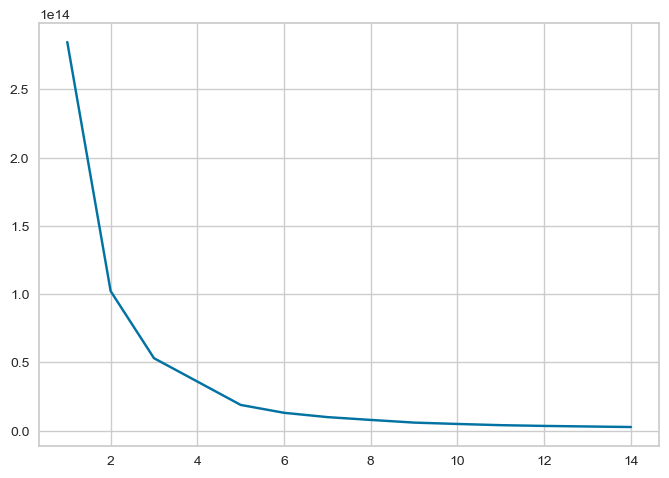

In [710]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

In [711]:
cluster_empr_22 = KMeans(n_clusters=5, random_state=42).fit(df_c_22)

In [712]:
cluster_empr_22.labels_

array([0, 0, 0, ..., 0, 0, 3])

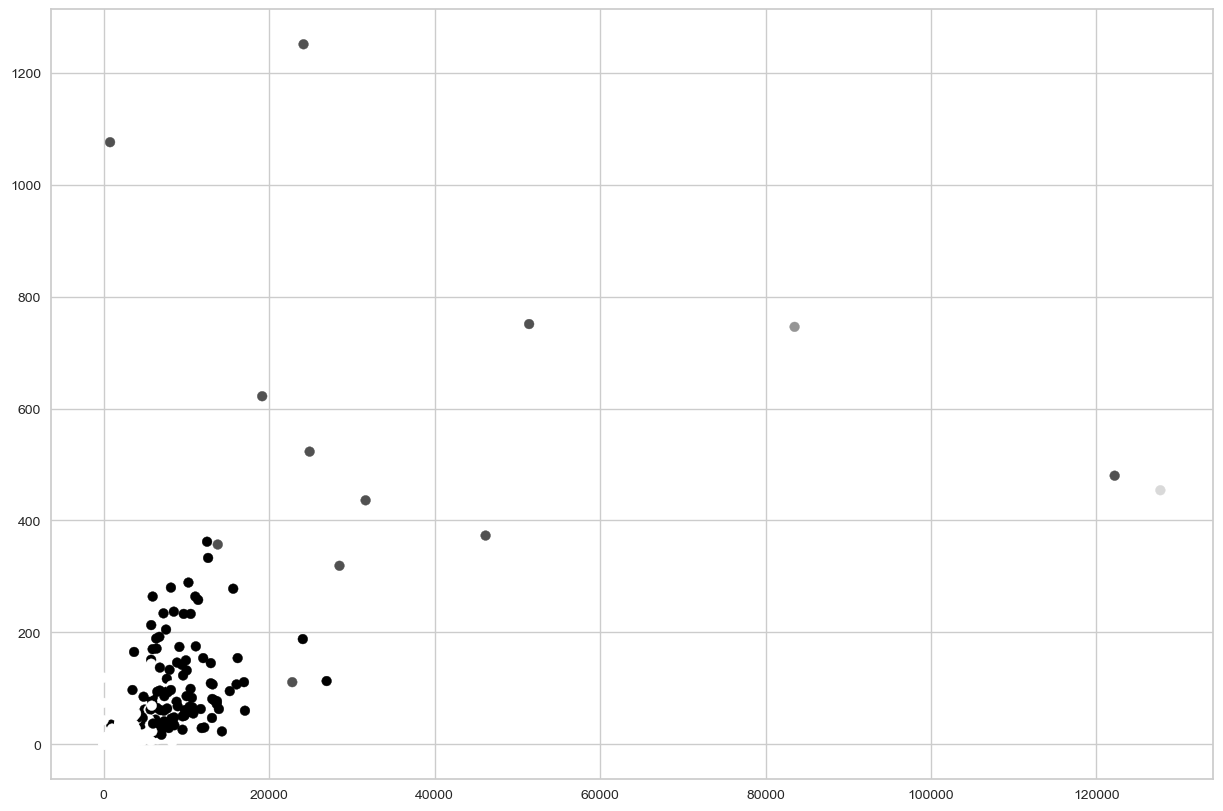

In [713]:
fig, ax = plt.subplots(figsize= (15,10))

ax.scatter(df_c_22.iloc[:,1], df_c_22.iloc[:,0], c = cluster_empr_22.labels_)

plt.show()

In [714]:
df_c_22['cluster'] = cluster_empr_22.labels_

In [715]:
df_c_22.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,8,926,8,70,2,30,497,504,491,543,...,0,0,0,0,0,0,0,0,0,0
110002,38,2563,21,93,99,342,474,495,484,518,...,0,1,0,1,1,0,0,1,0,0
110003,0,344,5,78,0,0,477,486,447,522,...,1,0,0,0,1,0,0,0,0,0
110004,21,1971,19,105,184,422,489,505,490,533,...,0,1,1,1,0,0,0,0,0,0
110005,3,591,8,108,4,35,479,477,454,480,...,0,0,0,0,0,1,0,0,0,0


In [716]:
col_empr = df['qtd_abertas_Empresario_Individual']
display(col_empr)
  
df_c_22 = df_c_22.join(col_empr )

cod_municipio_ibge
110001      194
110002     1275
110003       49
110004     1258
110005      257
          ...  
522200      222
522205       66
522220       23
522230       47
530010    54325
Name: qtd_abertas_Empresario_Individual, Length: 5570, dtype: int64

In [717]:
df_c_22

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster,qtd_abertas_Empresario_Individual
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,8,926,8,70,2,30,497,504,491,543,...,0,0,0,0,0,0,0,0,0,194
110002,38,2563,21,93,99,342,474,495,484,518,...,1,0,1,1,0,0,1,0,0,1275
110003,0,344,5,78,0,0,477,486,447,522,...,0,0,0,1,0,0,0,0,0,49
110004,21,1971,19,105,184,422,489,505,490,533,...,1,1,1,0,0,0,0,0,0,1258
110005,3,591,8,108,4,35,479,477,454,480,...,0,0,0,0,1,0,0,0,0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,1,528,6,106,4,12,449,479,473,516,...,0,0,0,0,0,1,0,0,0,222
522205,0,394,8,104,0,0,450,464,457,504,...,1,0,1,0,0,0,1,0,0,66
522220,0,403,1,66,0,0,431,443,426,445,...,0,1,1,0,0,0,0,0,0,23


In [718]:
df_c_22['cluster'].value_counts()

0    5432
4     125
3      11
2       1
1       1
Name: cluster, dtype: int64

In [719]:
df_c_22.loc[df_c_22['cluster'] == 0,'novos_clusters'] = 0

In [720]:
df_c_22.loc[df_c_22['cluster'] == 1,'novos_clusters'] = 1

In [721]:
df_c_22.loc[df_c_22['cluster'] == 2,'novos_clusters'] = 1

In [722]:
df_c_22.loc[df_c_22['cluster'] == 3,'novos_clusters'] = 1

In [723]:
df_c_22.loc[df_c_22['cluster'] == 4,'novos_clusters'] = 2

In [724]:
df_c_22 = df_c_22.astype('int64')

In [725]:
df_c_22

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster,qtd_abertas_Empresario_Individual,novos_clusters
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,8,926,8,70,2,30,497,504,491,543,...,0,0,0,0,0,0,0,0,194,0
110002,38,2563,21,93,99,342,474,495,484,518,...,0,1,1,0,0,1,0,0,1275,0
110003,0,344,5,78,0,0,477,486,447,522,...,0,0,1,0,0,0,0,0,49,0
110004,21,1971,19,105,184,422,489,505,490,533,...,1,1,0,0,0,0,0,0,1258,0
110005,3,591,8,108,4,35,479,477,454,480,...,0,0,0,1,0,0,0,0,257,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,1,528,6,106,4,12,449,479,473,516,...,0,0,0,0,1,0,0,0,222,0
522205,0,394,8,104,0,0,450,464,457,504,...,0,1,0,0,0,1,0,0,66,0
522220,0,403,1,66,0,0,431,443,426,445,...,1,1,0,0,0,0,0,0,23,0


In [726]:
#pegado os municipios de acordo com os  habitantes 
df_c_22 = df_c_22.loc[df_c_22['novos_clusters'] == 2]
df_c_22

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster,qtd_abertas_Empresario_Individual,novos_clusters
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110020,145,12963,23,106,424,1595,473,496,482,511,...,1,0,0,1,0,0,0,4,7893,2
120040,189,6364,19,104,231,978,477,505,491,516,...,0,0,0,1,0,0,0,4,4211,2
140010,150,9954,18,114,174,878,482,506,494,513,...,0,0,1,0,0,1,0,4,5474,2
150080,233,10532,11,98,81,575,475,506,485,506,...,0,0,0,1,0,0,0,4,6766,2
150420,142,9479,6,109,334,824,475,498,474,513,...,0,0,0,1,0,0,0,4,2997,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510760,48,4189,20,162,339,766,481,504,490,530,...,0,0,0,0,0,1,0,4,4667,2
510840,60,7298,20,114,242,710,467,497,480,509,...,1,0,0,0,0,1,0,4,4782,2
520110,146,8886,16,122,603,1244,499,526,509,551,...,0,0,0,0,0,0,0,4,7636,2


In [44]:
#df_c_22.to_excel('df_c_22.xlsx')

### Kmeans - 2019

In [727]:
df_c_19 = df_2

In [84]:
df_c_19 = df_c_19.drop('qtd_abertas_Empresario_Individual', axis = 1)

In [85]:
df_c_19.head()


,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7.0,926.0,5.391153,34.342994,6.0,23.0,480.664286,543.020270,495.929730,502.991429,...,0,0,0,0,0,0,0,0,0,0
110002,41.0,2563.0,11.445074,86.588543,42.0,299.0,481.314239,549.247267,513.304727,512.975890,...,0,0,1,0,1,1,0,0,1,0
110003,0.0,344.0,3.990964,79.838102,0.0,0.0,442.604167,506.685185,466.007407,484.925000,...,0,1,0,0,0,1,0,0,0,0
110004,17.0,1971.0,12.382994,89.462154,202.0,469.0,484.990720,549.739357,513.924809,524.946720,...,1,0,1,1,1,0,0,0,0,0
110005,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433803,551.494737,498.394737,493.949296,...,0,0,0,0,0,0,1,0,0,0


In [357]:
df_c_19 = df_c_19.astype('int64')

In [87]:
df_c_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 110001 to 530010
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   taxa_homicidio                 5570 non-null   int64
 1   RH_adm_dir                     5570 non-null   int64
 2   densidade_banda_larga          5570 non-null   int64
 3   densidade_telefonia_movel      5570 non-null   int64
 4   qtd_cursos_engenharias         5570 non-null   int64
 5   qtd_cursos_negocios_direito    5570 non-null   int64
 6   media_notas_CN                 5570 non-null   int64
 7   media_notas_CH                 5570 non-null   int64
 8   media_NU_NOTA_LC               5570 non-null   int64
 9   media_NU_NOTA_MT               5570 non-null   int64
 10  media_NU_NOTA_REDACAO          5570 non-null   int64
 11  valor_medio_recebido_familia   5570 non-null   int64
 12  pib_per_capita_preco_corrente  5570 non-null   int64
 13  perc_20_59_

In [88]:
valores_k =[]
inercias =[]

for i in range(1,15):
    cluster_empr = KMeans(n_clusters=i, random_state=42).fit(df_c_19)
    valores_k.append(i)
    inercias.append(cluster_empr.inertia_)
    

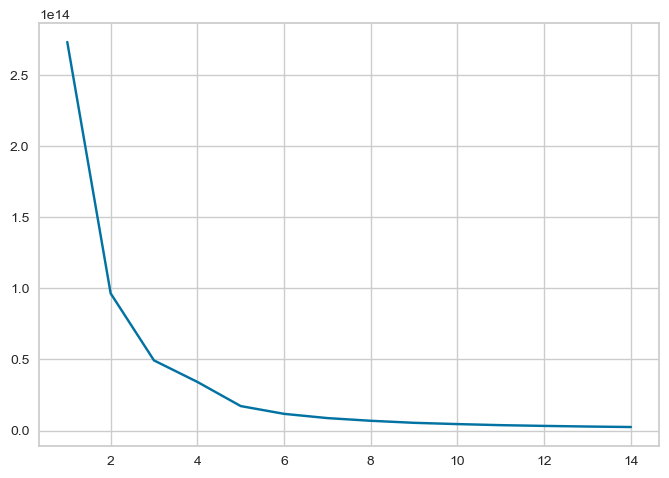

In [89]:
fig, ax = plt.subplots()

ax.plot(valores_k,inercias)

plt.show()

In [90]:
cluster_empr_19 = KMeans(n_clusters=3, random_state=42).fit(df_c_19)

In [91]:
cluster_empr_19.labels_

array([0, 0, 0, ..., 0, 0, 2])

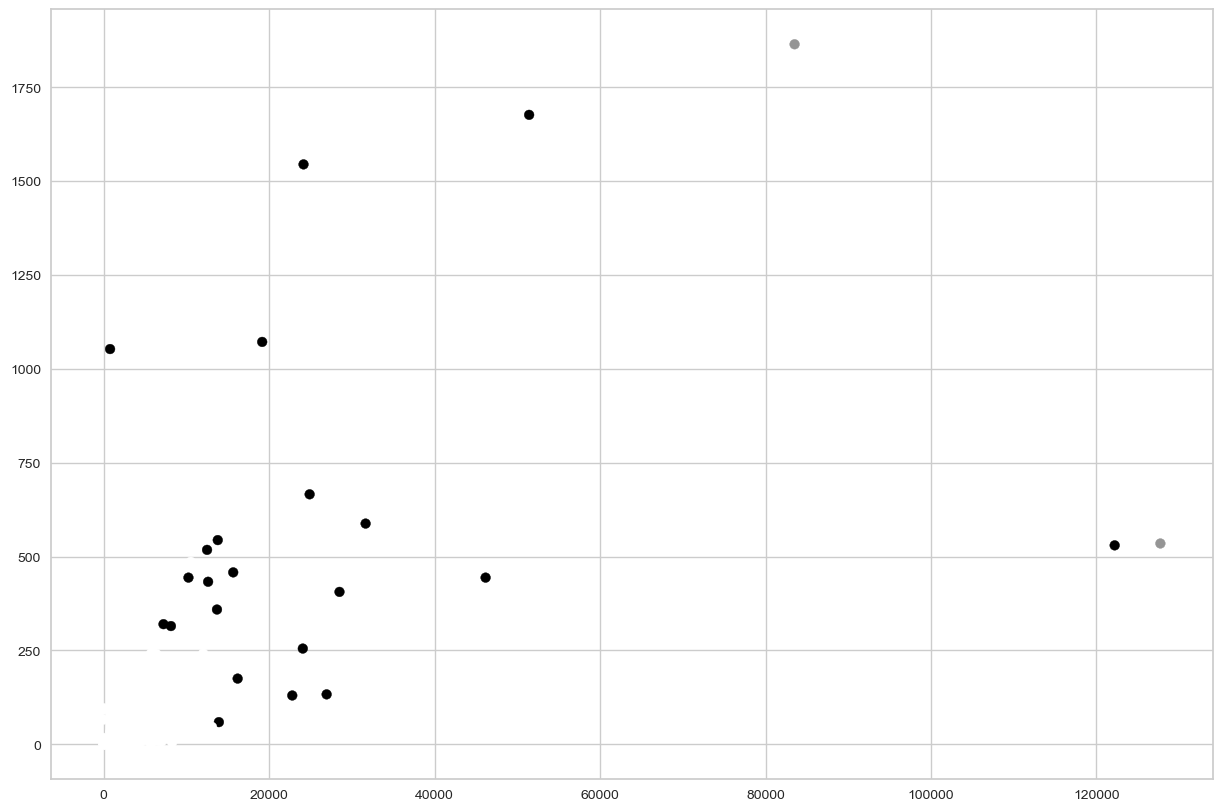

In [92]:
#verificar se eu dividi as posições de x e y corretamente

fig, ax = plt.subplots(figsize= (15,10))

ax.scatter(df_c_19.iloc[:,1], df_c_19.iloc[:,0], c = cluster_empr_19.labels_)

plt.show()

In [93]:
df_c_19['cluster'] = cluster_empr_19.labels_

In [94]:
df_c_19.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7,926,5,34,6,23,480,543,495,502,...,0,0,0,0,0,0,0,0,0,0
110002,41,2563,11,86,42,299,481,549,513,512,...,0,1,0,1,1,0,0,1,0,0
110003,0,344,3,79,0,0,442,506,466,484,...,1,0,0,0,1,0,0,0,0,0
110004,17,1971,12,89,202,469,484,549,513,524,...,0,1,1,1,0,0,0,0,0,0
110005,2,591,7,89,0,38,466,551,498,493,...,0,0,0,0,0,1,0,0,0,0


In [362]:
df_c_19= df_c_19.drop('porte_municipio', axis = 1)

In [337]:
col_empr = df_2['qtd_abertas_Empresario_Individual']
display(col_empr)
  
df_c_19 = df_c_19.join(col_empr)

cod_municipio_ibge
110001      167
110002     1058
110004      987
110005      181
110006      173
          ...  
522200      150
522205       47
522220       22
522230       25
530010    47504
Name: qtd_abertas_Empresario_Individual, Length: 3950, dtype: int64

ValueError: columns overlap but no suffix specified: Index(['qtd_abertas_Empresario_Individual'], dtype='object')

In [729]:
col_clu = df_c_22['novos_clusters']
display(col_clu)
  
df_c_19 = df_c_19.join(col_clu)

cod_municipio_ibge
110020    2
120040    2
140010    2
150080    2
150420    2
         ..
510760    2
510840    2
520110    2
520140    2
521880    2
Name: novos_clusters, Length: 125, dtype: int64

In [730]:
df_c_19

,qtd_abertas_Empresario_Individual,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,novos_clusters
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,167,7.0,926.0,5.391153,34.342994,6.0,23.0,480.664286,543.020270,495.929730,...,0,0,0,0,0,0,0,0,0,NaN
110002,1058,41.0,2563.0,11.445074,86.588543,42.0,299.0,481.314239,549.247267,513.304727,...,0,1,0,1,1,0,0,1,0,NaN
110003,50,0.0,344.0,3.990964,79.838102,0.0,0.0,442.604167,506.685185,466.007407,...,1,0,0,0,1,0,0,0,0,NaN
110004,987,17.0,1971.0,12.382994,89.462154,202.0,469.0,484.990720,549.739357,513.924809,...,0,1,1,1,0,0,0,0,0,NaN
110005,181,2.0,591.0,7.847822,89.952827,0.0,38.0,466.433803,551.494737,498.394737,...,0,0,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,150,2.0,528.0,7.191806,33.744500,0.0,0.0,474.571765,522.414607,493.386517,...,0,0,0,0,0,0,1,0,0,NaN
522205,47,4.0,394.0,8.601167,78.874528,0.0,0.0,439.651613,498.125641,463.625641,...,0,1,0,1,0,0,0,1,0,NaN
522220,22,3.0,403.0,5.055907,5.833738,0.0,0.0,440.164286,513.100000,450.394444,...,0,0,1,1,0,0,0,0,0,NaN


In [731]:
#pegado os municipios de acordo com os  habitantes 
df_c_19 = df_c_19.loc[df_c_19['novos_clusters'] == 2]
df_c_19

,qtd_abertas_Empresario_Individual,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,...,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,novos_clusters
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110020,5110,165.0,12963.0,15.946739,146.596317,421.0,1795.0,479.635906,545.669819,508.208563,...,0,0,1,0,0,1,0,0,0,2.0
120040,3195,241.0,6364.0,12.735964,122.719294,360.0,1248.0,476.936348,546.137031,509.023533,...,0,0,0,0,0,1,0,0,0,2.0
140010,3532,270.0,9954.0,8.443112,109.519480,139.0,1050.0,488.028033,550.877010,516.342373,...,0,1,0,0,1,0,0,1,0,2.0
150080,5266,486.0,10532.0,6.149854,91.489791,35.0,487.0,485.384037,561.117029,516.305017,...,0,0,0,0,0,1,0,0,0,2.0
150420,2010,210.0,9479.0,2.384472,187.657017,318.0,520.0,476.609322,533.510556,493.416402,...,0,0,0,0,0,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510760,3311,54.0,4189.0,14.019037,201.531672,404.0,1163.0,489.281264,553.426928,514.722245,...,0,1,0,0,0,0,0,1,0,2.0
510840,3429,89.0,7298.0,14.348828,103.392275,454.0,953.0,465.810537,533.729961,498.710841,...,1,1,1,0,0,0,0,1,0,2.0
520110,5302,152.0,8886.0,14.754874,164.854764,920.0,1385.0,501.630507,569.003072,527.354536,...,1,1,0,0,0,0,0,0,0,2.0


## Treinando o modelo com Cluster

### 2022

In [732]:
df_c_22.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster,qtd_abertas_Empresario_Individual,novos_clusters
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110020,145,12963,23,106,424,1595,473,496,482,511,...,1,0,0,1,0,0,0,4,7893,2
120040,189,6364,19,104,231,978,477,505,491,516,...,0,0,0,1,0,0,0,4,4211,2
140010,150,9954,18,114,174,878,482,506,494,513,...,0,0,1,0,0,1,0,4,5474,2
150080,233,10532,11,98,81,575,475,506,485,506,...,0,0,0,1,0,0,0,4,6766,2
150420,142,9479,6,109,334,824,475,498,474,513,...,0,0,0,1,0,0,0,4,2997,2


In [733]:
df_c_22= df_c_22.drop('cluster', axis = 1)

In [734]:
#df_c_22 = pd.get_dummies(df_c_22, columns = ['cluster']) #drop_first=True

In [735]:
#h = FeatureHasher(n_features=4)
#f = h.transform(df_c_22['cluster'])
#f.toarray()

In [736]:
df_c_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 110020 to 521880
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   taxa_homicidio                     125 non-null    int64
 1   RH_adm_dir                         125 non-null    int64
 2   densidade_banda_larga              125 non-null    int64
 3   densidade_telefonia_movel          125 non-null    int64
 4   qtd_cursos_engenharias             125 non-null    int64
 5   qtd_cursos_negocios_direito        125 non-null    int64
 6   media_notas_CN                     125 non-null    int64
 7   media_notas_CH                     125 non-null    int64
 8   media_NU_NOTA_LC                   125 non-null    int64
 9   media_NU_NOTA_MT                   125 non-null    int64
 10  media_NU_NOTA_REDACAO              125 non-null    int64
 11  valor_medio_recebido_familia       125 non-null    int64
 12  pib_per_capita

In [737]:
treino_clus = df_c_22.groupby('novos_clusters', group_keys=False).apply(lambda x: x.sample(frac=0.75, random_state = 123))

teste_clus = df_c_22.drop(treino_clus.index)

print(treino_clus.shape, teste_clus.shape)

(94, 31) (31, 31)


In [119]:
#treino_clus = pd.get_dummies(treino_clus, columns = ['cluster'], drop_first=True)
#teste_clus = pd.get_dummies(teste_clus, columns = ['cluster'], drop_first=True)

In [112]:
#treino_clus = treino_clus.drop('qtd_cursos_negocios_direito', axis = 1)
#teste_clus = teste_clus.drop('qtd_cursos_negocios_direito', axis = 1)

In [738]:
treino_clus = treino_clus.drop('novos_clusters', axis = 1)
teste_clus = teste_clus.drop('novos_clusters', axis = 1)

### Pycaret

#### RMSE

In [739]:
regression_setup_rmse = setup(data = treino_clus, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(94, 30)"
4,Transformed data shape,"(94, 30)"
5,Transformed train set shape,"(65, 30)"
6,Transformed test set shape,"(29, 30)"
7,Numeric features,29
8,Preprocess,True
9,Imputation type,simple


In [740]:
best_model_clus = compare_models(sort = 'RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,1181.9882,2256525.1540,1479.1782,0.6122,0.1877,0.1642,0.6900
br,Bayesian Ridge,1222.8481,2735509.1141,1617.4665,0.5903,0.2047,0.1725,0.6840
huber,Huber Regressor,1223.6395,2760051.3750,1623.7289,0.5963,0.2036,0.1688,0.6920
omp,Orthogonal Matching Pursuit,1236.5845,2823345.6793,1641.0011,0.5790,0.2051,0.1729,0.6760
et,Extra Trees Regressor,1261.9922,2999302.7251,1647.1032,0.6635,0.2092,0.1795,0.7640
lightgbm,Light Gradient Boosting Machine,1374.7368,3400425.7301,1700.0993,0.6531,0.2168,0.1901,0.8740
ridge,Ridge Regression,1343.6684,2980643.1070,1710.6045,0.4640,0.2214,0.1946,0.7020
xgboost,Extreme Gradient Boosting,1366.3065,3550431.0174,1774.6470,0.5874,0.2197,0.1887,0.6720
knn,K Neighbors Regressor,1371.2585,3420094.8732,1794.6338,0.4735,0.2303,0.1911,0.6760
rf,Random Forest Regressor,1405.4105,3818068.8387,1855.7724,0.5243,0.2289,0.1944,0.7580


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [540]:
print(best_model_clus)

HuberRegressor()


In [747]:
best_model_clus = create_model('omp', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,739.0838,1000370.9334,1000.1854,0.8404,0.1524,0.1149
1,1219.2252,3220883.7099,1794.6821,0.6242,0.2243,0.1765
2,1594.3060,3675716.9379,1917.2159,0.5141,0.2350,0.2044
3,1112.5954,2256059.6775,1502.0185,0.0929,0.2023,0.1801
4,1517.7122,3963697.1376,1990.9036,0.8234,0.2116,0.1889
Mean,1236.5845,2823345.6793,1641.0011,0.5790,0.2051,0.1729
Std,306.6526,1079817.1168,361.1939,0.2722,0.0286,0.0306


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [748]:
tuned_clus = tune_model(best_model_clus, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,642.2406,586231.8033,765.6578,0.9064,0.0986,0.0892
1,1258.5606,2870937.5238,1694.3841,0.6650,0.2053,0.1703
2,1340.8326,2731363.8010,1652.6838,0.6390,0.1851,0.1573
3,823.6761,1108785.2023,1052.9887,0.5542,0.1887,0.1397
4,1132.7735,2300095.7292,1516.6066,0.8975,0.1920,0.1470
Mean,1039.6167,1919482.8119,1336.4642,0.7324,0.1739,0.1407
Std,265.2862,910392.4284,365.1660,0.1432,0.0383,0.0277


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [62]:
print(tuned_clus)

OrthogonalMatchingPursuit()


In [63]:
#plot_model(tuned_clus, plot='feature')

In [743]:
final_model_baseline_rmse_clus = finalize_model(tuned_clus )

### Previsão - RMSE 2022

In [744]:
pred_teste_clus = predict_model(final_model_baseline_rmse_clus, data = teste_clus)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,1153.4226,1990644.5573,1410.9020,0.8448,0.2242,0.1640


In [745]:
pred_teste_clus

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
140010,150,9954,18,114,174,878,482,506,494,513,...,1,0,0,1,0,0,1,0,5474,6804.480661
250400,72,13674,23,111,442,1264,500,533,508,555,...,0,0,0,1,0,0,0,0,6036,8291.677169
270430,362,12509,17,117,1020,2690,494,522,505,550,...,1,0,0,0,1,0,0,0,14777,15161.482254
312230,43,4304,32,106,465,790,516,548,526,587,...,0,0,1,0,0,0,0,0,5472,5563.648936
314330,26,9546,19,114,745,1509,520,547,528,579,...,1,1,1,0,1,0,0,0,7607,8642.717753
317010,34,8554,36,114,535,904,519,547,530,578,...,0,1,1,0,0,0,1,0,5711,7801.962750
330070,107,13181,31,121,164,708,507,533,519,559,...,1,0,0,0,0,0,1,0,4231,4338.849074
330100,154,12042,17,98,524,832,505,536,520,559,...,1,0,0,0,0,0,1,0,6131,8326.485517
330190,137,6807,9,94,10,214,474,501,493,519,...,0,1,0,1,0,0,0,1,3256,1569.919555


Text(0, 0.5, 'Valores preditos')

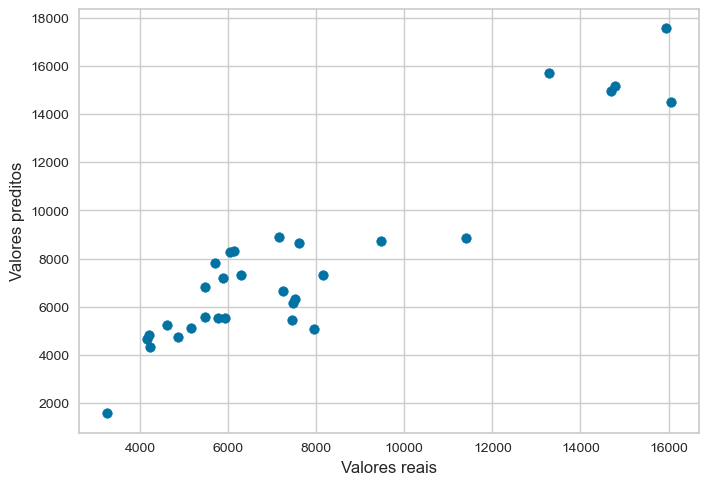

In [746]:
plt.scatter(pred_teste_clus['qtd_abertas_Empresario_Individual'],pred_teste_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

### Previsão - RMSE 2019

In [200]:
#df_c_19 = pd.get_dummies(df_c_19, columns = ['cluster'], drop_first=True)

In [647]:
pred_2018_2019_clus = predict_model(final_model_baseline_rmse_clus, data = df_c_19)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,1666.0833,7549483.9951,2747.6324,0.9863,0.2583,0.2047


In [648]:
pred_2018_2019_clus

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,novos_clusters,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110020,165.0,12963.0,15.946739,146.596313,421.0,1795.0,479.635895,545.669800,508.208557,516.175354,...,1,0,0,1,0,0,0,2.0,5110,7669.284884
120040,241.0,6364.0,12.735964,122.719292,360.0,1248.0,476.936340,546.137024,509.023529,510.679138,...,0,0,0,1,0,0,0,2.0,3195,3242.530015
130260,1053.0,787.0,15.118453,121.707809,3238.0,7370.0,476.666718,542.459778,508.008484,513.905823,...,0,1,0,0,0,0,0,1.0,20899,30674.526923
140010,270.0,9954.0,8.443111,109.519478,139.0,1050.0,488.028046,550.877014,516.342346,521.998352,...,0,0,1,0,0,1,0,2.0,3532,3219.477361
150080,486.0,10532.0,6.149854,91.489792,35.0,487.0,485.384033,561.117004,516.304993,521.491943,...,0,0,0,1,0,0,0,2.0,5266,4459.216984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520110,152.0,8886.0,14.754873,164.854767,920.0,1385.0,501.630493,569.003052,527.354553,540.895264,...,0,0,0,0,0,0,0,2.0,5302,6463.641932
520140,277.0,11430.0,16.368114,85.113091,21.0,639.0,483.334106,550.081299,510.650360,518.222717,...,1,0,1,0,0,1,0,2.0,7754,7944.703466
520870,588.0,31670.0,27.036442,157.520386,2803.0,5960.0,521.408020,583.936584,543.467346,569.476929,...,1,0,0,0,0,0,0,1.0,27320,27881.001781


Text(0, 0.5, 'Valores preditos')

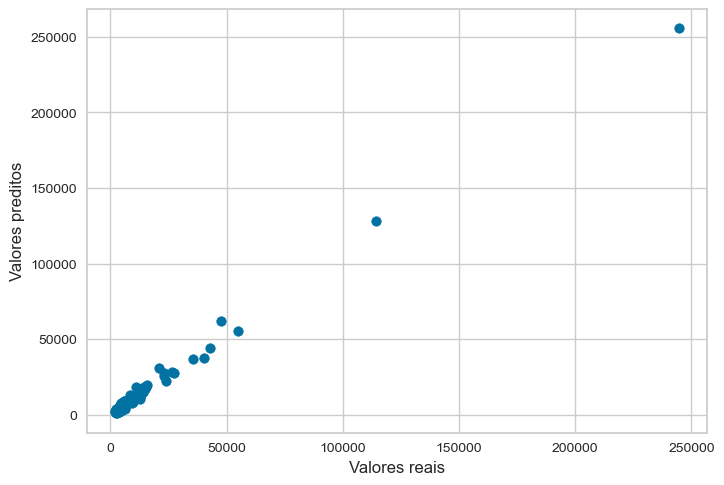

In [649]:
plt.scatter(pred_2018_2019_clus['qtd_abertas_Empresario_Individual'],pred_2018_2019_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')

In [305]:
pred_2018_2019_clus.to_excel('teste_cluster_2019_rf_com_tx_hom.xlsx')

In [650]:
soma_dos_negativos = sum([i for i in pred_2018_2019_clus['prediction_label'] if i < 0])

print('A soma dos elementos negativos é igual a {}'.format(soma_dos_negativos))

A soma dos elementos negativos é igual a 0


### MAPE

In [209]:
regression_setup = setup(data = treino_clus, target = 'qtd_abertas_Empresario_Individual', session_id = 42)

,Description,Value
0,Session id,42
1,Target,qtd_abertas_Empresario_Individual
2,Target type,Regression
3,Original data shape,"(4178, 32)"
4,Transformed data shape,"(4178, 32)"
5,Transformed train set shape,"(2924, 32)"
6,Transformed test set shape,"(1254, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [210]:
best_model_clus = compare_models(sort = 'MAPE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,179.0280,16004772.6030,2322.2651,0.7731,0.4216,0.4050,0.3900
et,Extra Trees Regressor,179.5765,20276159.1733,2419.4517,0.7753,0.4379,0.4319,0.4000
xgboost,Extreme Gradient Boosting,249.5722,31089943.0552,3928.3623,-3.2682,0.4969,0.4421,0.3480
knn,K Neighbors Regressor,200.5839,16417021.1078,2338.1788,0.7820,0.5157,0.5181,0.3780
dt,Decision Tree Regressor,209.6584,15163705.4052,2218.9993,0.7837,0.5730,0.5201,0.3760
gbr,Gradient Boosting Regressor,182.7819,15614910.8409,2229.0071,0.7808,0.5183,0.5483,0.3800
huber,Huber Regressor,127.3808,187801.1777,426.8476,0.9696,0.7422,0.7532,0.3680
par,Passive Aggressive Regressor,261.4468,2887050.1596,1514.1295,0.7672,1.1260,1.5868,0.3700
lr,Linear Regression,145.7902,315136.9514,491.7230,0.9746,1.0041,1.6783,0.3940
lightgbm,Light Gradient Boosting Machine,369.3727,20181251.8655,3226.5148,0.3199,0.7495,1.7403,0.4520


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [215]:
print(best_model_clus)

RandomForestRegressor(n_jobs=-1, random_state=42)


In [216]:
best_model_clus = create_model('rf', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,87.8996,173907.4749,417.0222,0.9502,0.4169,0.3833
1,138.1802,881109.7900,938.6745,0.7834,0.4180,0.4105
2,455.0965,77951152.6873,8828.9950,0.3006,0.4434,0.4318
3,101.6848,501656.0595,708.2768,0.8970,0.4367,0.4320
4,112.2790,516037.0035,718.3572,0.9346,0.3931,0.3673
Mean,179.0280,16004772.6030,2322.2651,0.7731,0.4216,0.4050
Std,139.0138,30973998.8577,3257.5846,0.2434,0.0176,0.0260


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [213]:
tuned_clus = tune_model(best_model_clus, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,131.0359,140620.9090,374.9945,0.9597,0.8817,1.6030
1,209.3539,878141.6425,937.0921,0.7841,0.8018,1.2665
2,535.4115,89773341.5063,9474.8795,0.1945,0.7830,1.1426
3,130.3227,385638.3118,620.9978,0.9208,0.7895,1.1914
4,195.8724,720789.1372,848.9930,0.9087,0.7257,0.9969
Mean,240.3993,18379706.3014,2451.3914,0.7536,0.7963,1.2401
Std,151.0337,35697742.1904,3517.1560,0.2857,0.0501,0.2017


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [214]:
print(tuned_clus)

RandomForestRegressor(n_jobs=-1, random_state=42)


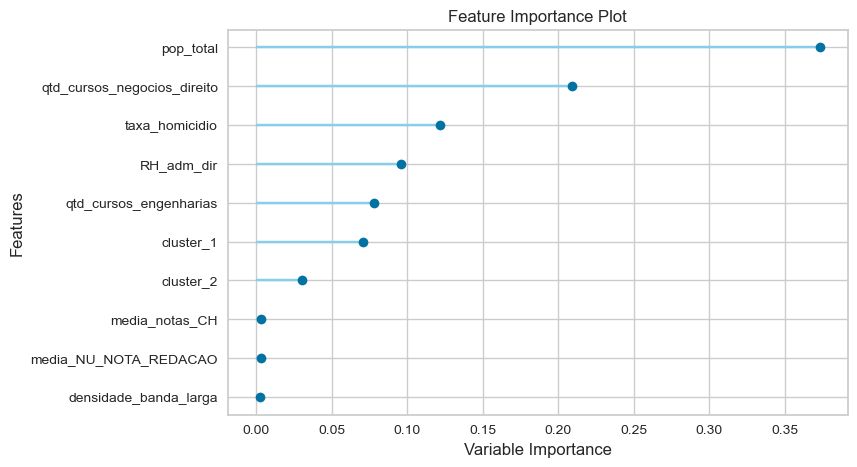

In [217]:
plot_model(best_model_clus, plot='feature')

In [218]:
final_model_baseline_mape_clus = finalize_model(best_model_clus)

### Previsão - Mape 2022

In [219]:
pred_teste_clus = predict_model(final_model_baseline_mape_clus, data = teste_clus)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,93.8469,119848.8287,346.1919,0.9615,0.4130,0.3824


In [220]:
pred_teste_clus

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster_1,cluster_2,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110003,0,344,5,78,0,0,477,486,447,522,...,0,1,0,0,0,0,0,0,49,52.54
110004,21,1971,19,105,184,422,489,505,490,533,...,1,0,0,0,0,0,0,0,1258,1375.89
110009,7,893,10,60,0,22,461,469,466,502,...,0,0,0,0,1,0,0,0,319,233.55
110015,6,1425,12,111,18,60,458,476,470,507,...,0,0,0,0,0,0,0,0,461,578.26
110020,145,12963,23,106,424,1595,473,496,482,511,...,0,0,1,0,0,0,0,0,7893,9242.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522040,3,1064,17,84,0,13,454,472,466,498,...,1,0,0,0,0,0,0,0,231,248.67
522150,3,296,1,87,0,0,418,419,414,436,...,1,0,0,0,0,0,0,0,25,46.96
522157,0,209,3,81,0,0,430,435,486,514,...,0,0,0,0,1,0,0,0,14,23.10


Text(0, 0.5, 'Valores preditos')

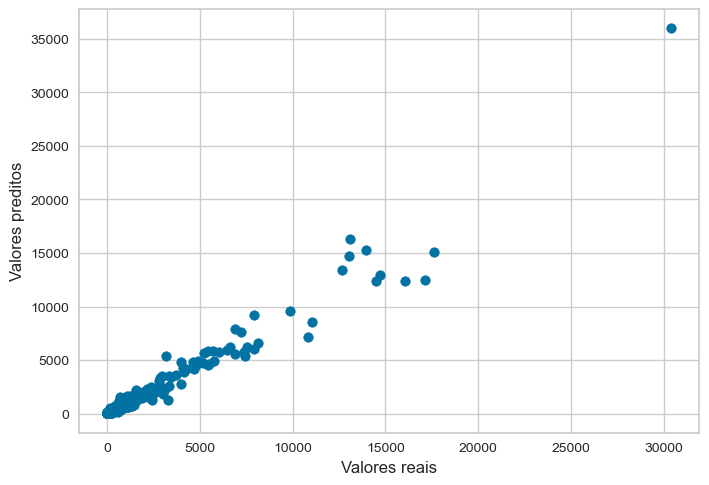

In [221]:
plt.scatter(pred_teste_clus['qtd_abertas_Empresario_Individual'],pred_teste_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2022.png')

### Previsão - Mape 2019

In [222]:
pred_2018_2019_clus = predict_model(final_model_baseline_mape_clus, data = df_c_19)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,116.1945,786575.1478,886.8907,0.9529,0.4530,0.4667


In [223]:
pred_2018_2019_clus

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima,cluster_1,cluster_2,qtd_abertas_Empresario_Individual,prediction_label
cod_municipio_ibge,,,,,,,,,,,,,,,,,,,,,
110001,7,926,5,34,6,23,480,543,495,502,...,0,0,0,0,0,0,0,0,167,205.29
110002,41,2563,11,86,42,299,481,549,513,512,...,1,1,0,0,1,0,0,0,1058,1264.52
110003,0,344,3,79,0,0,442,506,466,484,...,0,1,0,0,0,0,0,0,50,50.18
110004,17,1971,12,89,202,469,484,549,513,524,...,1,0,0,0,0,0,0,0,987,1240.49
110005,2,591,7,89,0,38,466,551,498,493,...,0,0,1,0,0,0,0,0,181,215.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522200,2,528,7,33,0,0,474,522,493,503,...,0,0,0,1,0,0,0,0,150,105.64
522205,4,394,8,78,0,0,439,498,463,479,...,1,0,0,0,1,0,0,0,47,88.38
522220,3,403,5,5,0,0,440,513,450,504,...,1,0,0,0,0,0,0,0,22,45.58


Text(0, 0.5, 'Valores preditos')

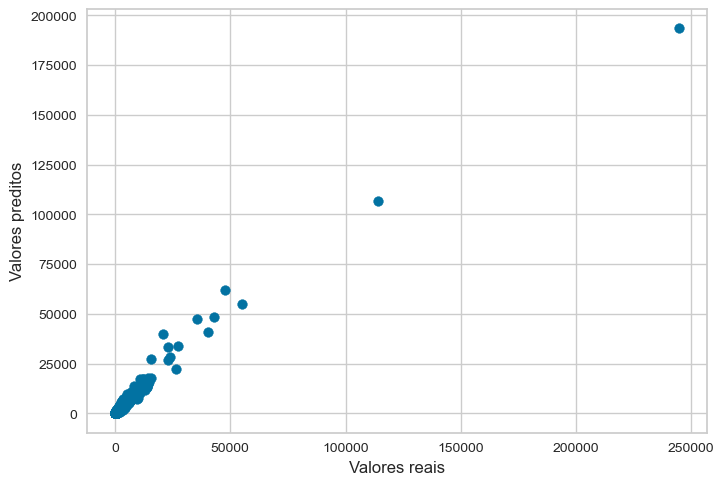

In [224]:
plt.scatter(pred_2018_2019_clus['qtd_abertas_Empresario_Individual'],pred_2018_2019_clus['prediction_label'])
plt.xlabel('Valores reais')
plt.ylabel('Valores preditos')
#plt.savefig('previsao_2019.png')